<a href="https://colab.research.google.com/github/majidiali1/machine-learning/blob/main/FeatureImportance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluating feature importance**

# **Principle Component Analysis**

In [47]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'feature1': [1, 4, 6, 8, 10],
    'feature2': [5, 4, 8, 2, 1],
    'feature3': [1, 4, 6, 8, 10]
}
df = pd.DataFrame(data)

In [48]:
# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # None means all components are kept
pca.fit(df_scaled)
X_pca = pca.fit_transform(df)

explained_variance_ratio = pca.explained_variance_ratio_
feature_importance_matrix = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 7))

# Scree Plot
axes[0].bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
axes[0].set_title('Scree Plot')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained')
axes[0].set_xticks(range(1, pca.n_components_ + 1))

# PCA Component Makeup
feature_importance_matrix.abs().plot(kind='bar', ax=axes[1])
axes[1].set_title('PCA Component Makeup')
axes[1].set_ylabel('Absolute Coefficient Value')
axes[1].set_xlabel('Principal Components')

# Show the plots
plt.tight_layout()  # Adjust layout to not overlap
plt.show()

# **Feature Correlation Matrix**

          feature1  feature2  feature3
feature1  1.000000 -0.548844  1.000000
feature2 -0.548844  1.000000 -0.548844
feature3  1.000000 -0.548844  1.000000


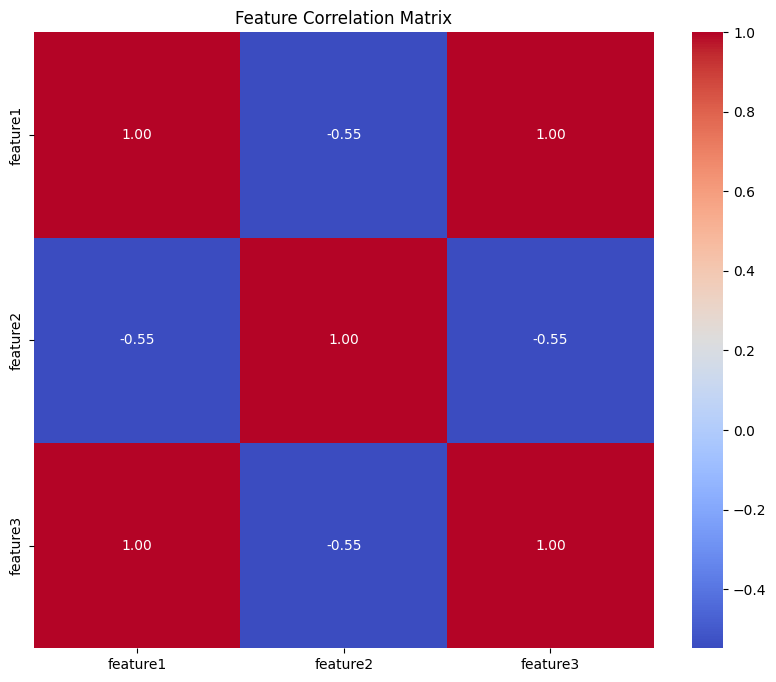

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
corr_matrix = df.corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()